In [99]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)

# Data Loading

[data] Telco Customer Churn (Kaggle)

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [100]:
df = pd.read_csv('C:/Users/Administrator/donghyun/02-MachineLearning/data/Telco-Customer-Churn.csv',
skipinitialspace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes


# Preprocessing

In [101]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# gender
# 고객이 남성인지 여성인지 여부

# SeniorCitizen
# 고객이 노인인지 여부 (1: 예, 0: 아니오)

# Partner
# 고객이 파트너가 있는지 여부 (예, 아니오)

# Dependents
# 고객에게 부양가족이 있는지 여부 (예, 아니오)

# tenure
# 고객이 회사와 함께한 기간(개월 수)

# PhoneService
# 고객이 전화 서비스를 이용하는지 여부 (예, 아니오)

# MultipleLines
# 고객이 여러 회선 서비스를 이용하는지 여부 (예, 아니오, 전화 서비스 없음)

# InternetService
# 고객의 인터넷 서비스 제공업체 (DSL, 광섬유, 없음)

# OnlineSecurity
# 고객이 온라인 보안 서비스를 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음)

# OnlineBackup
# 고객이 온라인 백업 서비스를 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음)

# DeviceProtection
# 고객이 장치 보호 서비스를 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음)

# TechSupport
# 고객이 기술 지원 서비스를 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음)

# StreamingTV
# 고객이 스트리밍 TV 서비스를 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음)

# StreamingMovies
# 고객이 스트리밍 영화 서비스를 이용하는지 여부 (예, 아니오, 인터넷 서비스 없음)

# Contract
# 고객의 계약 기간 (월별, 1년, 2년)

# PaperlessBilling
# 고객이 전자 청구서를 이용하는지 여부 (예, 아니오)

# PaymentMethod
# 고객의 결제 방법 (전자 체크, 우편 체크, 자동 은행 이체, 신용카드)

# MonthlyCharges
# 고객에게 매월 청구되는 금액

# TotalCharges
# 고객에게 총 청구된 금액

# Churn
# 고객이 이탈했는지 여부 (예, 아니오)

In [102]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [103]:
df[df['TotalCharges'].isna()] #TotalCharges가 NA인 사람은 첫가입 고객임을 알 수 있음.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.5500,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.2500,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.8500,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.7500,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.0500,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.8500,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.3500,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.7000,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.3500,NaN,No


In [104]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.5500,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.2500,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.8500,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.7500,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.0500,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.8500,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.3500,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.7000,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.3500,NaN,No


In [105]:
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = df['MonthlyCharges'] #따라서 결측치를 MonthlyCharges로 대체해줌

In [106]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [107]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0000,7043.0000,7043.0000,7043.0000
mean,0.1621,32.3711,64.7617,2279.7990
std,0.3686,24.5595,30.0900,2266.7302
min,0.0000,0.0000,18.2500,18.8000
25%,0.0000,9.0000,35.5000,398.5500
50%,0.0000,29.0000,70.3500,1394.5500
75%,0.0000,55.0000,89.8500,3786.6000
max,1.0000,72.0000,118.7500,8684.8000


In [108]:
columns_to_convert=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
columns_to_encode=['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract'
                   ,'PaymentMethod']

df[columns_to_convert]=df[columns_to_convert].replace({'Yes':1,'No':0})
df = pd.get_dummies(df,columns=columns_to_encode,dtype=int)
print("Encoded successfully.")
df.head()

Encoded successfully.


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.8500,29.8500,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.9500,1889.5000,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,1,53.8500,108.1500,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.3000,1840.7500,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.7000,151.6500,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [109]:
df.dtypes

customerID                                  object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                int64
gender_Male                                  int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet serv

In [110]:
df.drop(columns=['customerID'], inplace=True)

In [111]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.8500,29.8500,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.9500,1889.5000,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.8500,108.1500,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.3000,1840.7500,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.7000,151.6500,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## Correlation

Target 컬럼에 가장 영향을 많이 미치고 있는 변수 3개 확인 

In [112]:
df_corr = df.corr()['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
df_corr.head(3)

Contract_Month-to-month    0.4051
tenure                    -0.3522
OnlineSecurity_No          0.3426
Name: Churn, dtype: float64

In [113]:
top_3_features = df_corr.head(3).index.tolist()
top_3_corr = df[top_3_features + ['Churn']].corr()

top_3_corr

,Contract_Month-to-month,tenure,OnlineSecurity_No,Churn
Contract_Month-to-month,1.0000,-0.6456,0.4033,0.4051
tenure,-0.6456,1.0000,-0.2637,-0.3522
OnlineSecurity_No,0.4033,-0.2637,1.0000,0.3426
Churn,0.4051,-0.3522,0.3426,1.0000


<Axes: >

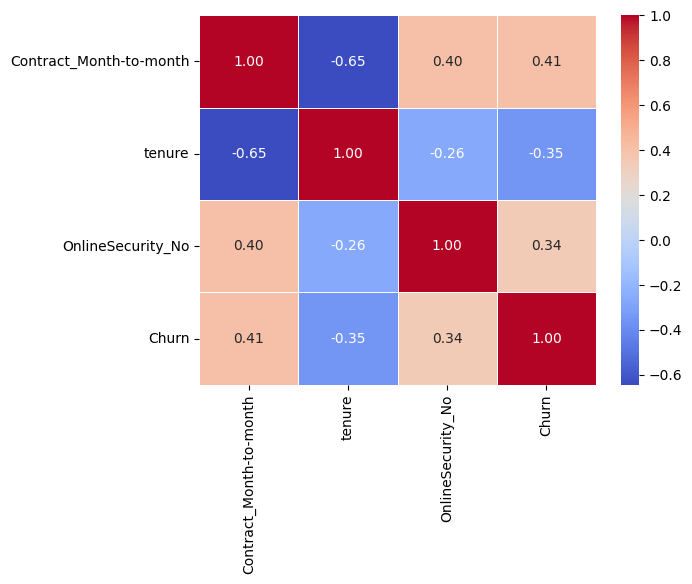

In [114]:
sns.heatmap(
    top_3_corr, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    linewidths=0.5,
)

# Machine Learning Classification

### Dataset Definition

In [115]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [116]:

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
)

In [117]:
X.select_dtypes(include=['float'])

,MonthlyCharges,TotalCharges
0,29.8500,29.8500
1,56.9500,1889.5000
2,53.8500,108.1500
3,42.3000,1840.7500
4,70.7000,151.6500
...,...,...
7038,84.8000,1990.5000
7039,103.2000,7362.9000
7040,29.6000,346.4500
7041,74.4000,306.6000


In [118]:
X.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

## Modeling

(대상) Decision Tree, randomForest, SVM, XGB, LGBM

1. 위 알고리즘 중 가장 최적의 예측 성능을 보이는 알고리즘 확인
    - Decision Tree : max_depth = 5
    - SVM : kernel='rbf'
    - randomForest : n_estimators = 100, max_depth = 5
    - 현재 단계에서는 cross validation은 고려하지 않음  
2. 최적의 성능을 보이는 알고리즘의 feature importance 확인 
3. 최적의 모델에 대해서만 예측 성능 확인 (accuracy_score)
4. 위 과정에서 추가적으로 데이터 표준화 처리가 필요한지 검토

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline

#### 1. Models

In [120]:
random_state = 42
max_depth = 5
n_estimators = 100

In [123]:
models = {
    'DecisionTree': DecisionTreeClassifier(
        max_depth=max_depth, 
        random_state=random_state,
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=n_estimators, # 생성 트리 개수 
        max_depth=max_depth, 
        random_state=random_state,
    ),
    'SVM': SVC(
        kernel='rbf', 
        random_state=random_state,
    ),
    'XGBoost': XGBClassifier(
        use_label_encoder=False, 
        eval_metric='logloss', # 필수는 아님. 경고 메시지 처리 위해 추가한 옵션 
        random_state=random_state,
    ),
    'LGBM': LGBMClassifier(random_state=random_state)
}

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)  # 연속형 변수에만 MinMaxScaler 적용
    ])

In [126]:
for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # 전처리 단계: MinMaxScaler
        ('classifier', model)  # 분류기
    ])
    pipeline.fit(X_train, y_train)
    print(f"{model_name} Model Score: {pipeline.score(X_test, y_test)}")


DecisionTree Model Score: 0.7906316536550745
RandomForest Model Score: 0.8026969481902059
SVM Model Score: 0.7998580553584103
XGBoost Model Score: 0.7863733144073811
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
LGBM Model Score: 0.8005677785663591


In [125]:
X_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       

In [90]:
best_model_name = None
best_accuracy = 0
best_model_instance = None

In [91]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model_instance = model

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

DecisionTree Accuracy: 0.7999
RandomForest Accuracy: 0.7999
SVM Accuracy: 0.7353
XGBoost Accuracy: 0.7942
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
LGBM Accuracy: 0.8055

Best Model: LGBM with Accuracy: 0.8055


#### 2. Feature Importance

Best Model의 Feature Importance 확인 

In [75]:
if best_model_name in ['DecisionTree', 'RandomForest', 'XGBoost', 'LGBM']:
    feature_importances = best_model_instance.feature_importances_
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    print(f"\nFeature Importance - {best_model_name}:")
    print(importance_df.head(10))
else:
    print(f"\n{best_model_name} does not support feature importance.")


Feature Importance - LGBM:
                                    Feature  Importance
6                            MonthlyCharges         808
7                              TotalCharges         671
3                                    tenure         465
5                          PaperlessBilling          91
39           PaymentMethod_Electronic check          77
8                             gender_Female          67
1                                   Partner          59
16                        OnlineSecurity_No          54
37  PaymentMethod_Bank transfer (automatic)          52
35                        Contract_One year          49


#### 3. Predict 

Best Model의 분류 성능 확인 

In [76]:
y_pred_best = best_model_instance.predict(X_test)
accuracy_score(y_test, y_pred_best)

0.8055358410220014

In [77]:
confusion_matrix(y_test, y_pred_best)

array([[935, 101],
       [173, 200]])

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

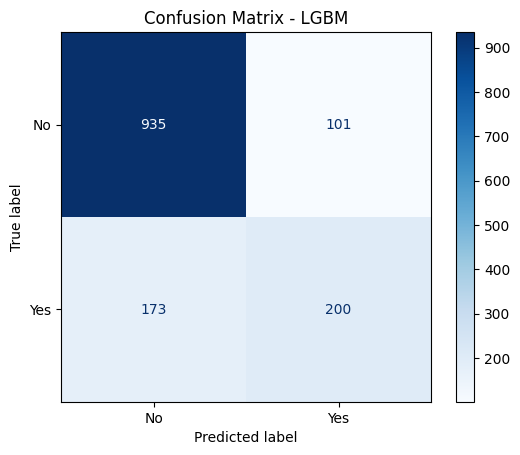

In [79]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

-------------
** End of Docuemtns **